In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("train.csv")
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Check number of survivors

In [3]:
number_of_survived = np.sum(raw_data["Survived"])
survived_rate = number_of_survived/len(raw_data["Survived"])
survived_rate

0.3838383838383838

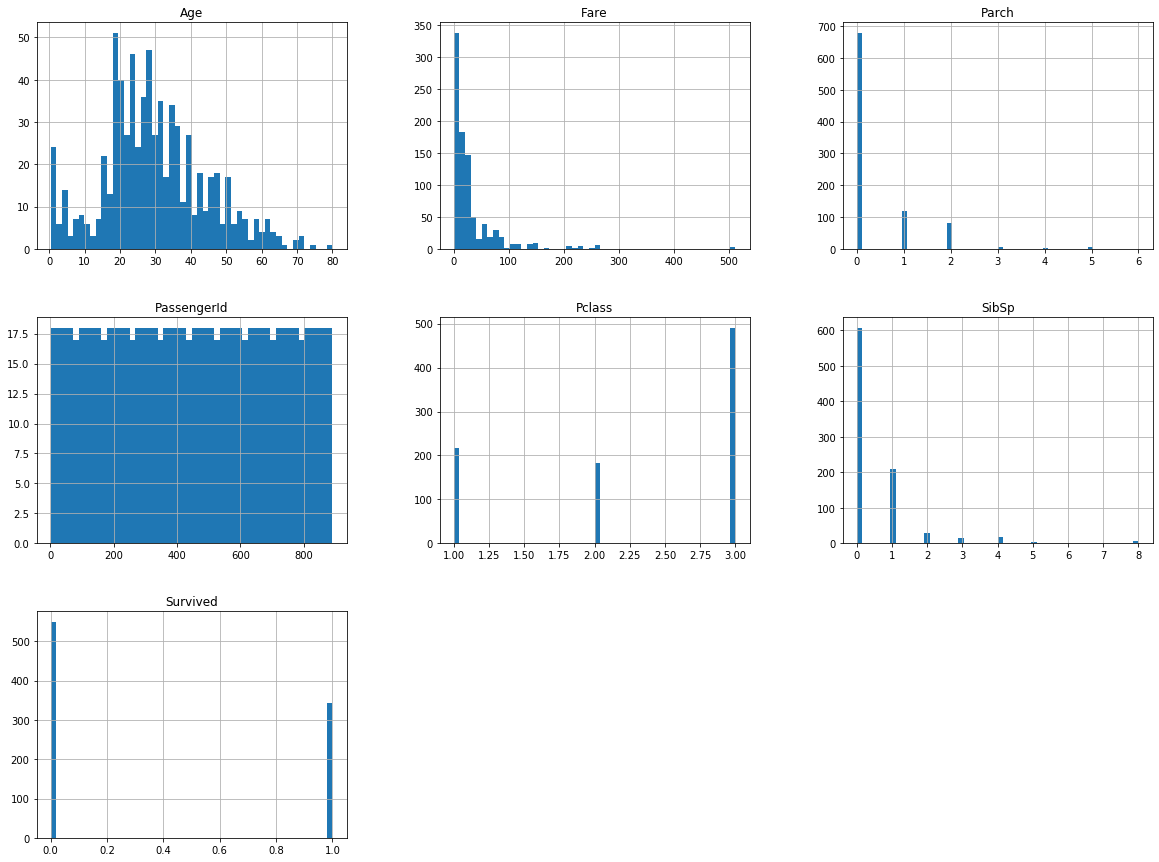

In [4]:
raw_data.hist(bins=50, figsize = (20,15) )
plt.show()

Drop non-useful features

In [5]:
raw_data = raw_data.drop("Name",axis=1)

In [6]:
raw_data = raw_data.drop("Ticket",axis=1)

In [7]:
raw_data = raw_data.drop("PassengerId",axis=1)
raw_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


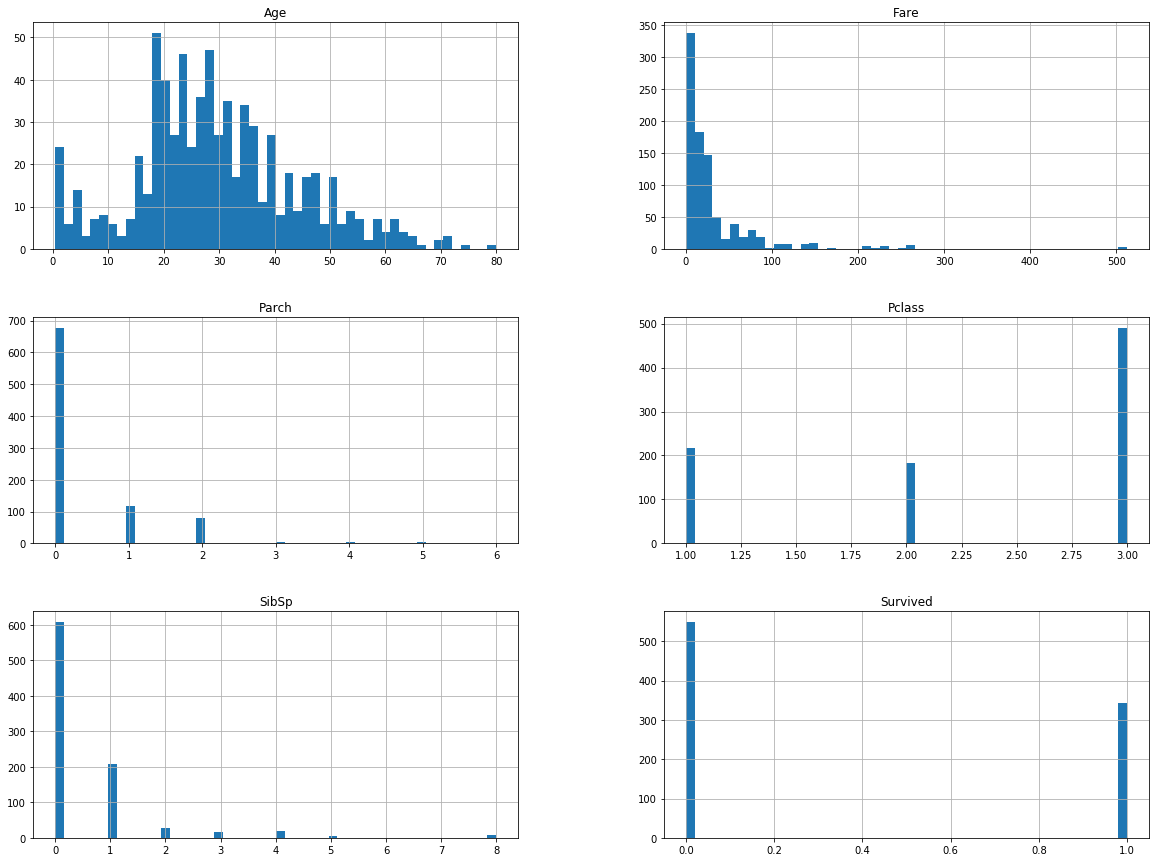

In [8]:
raw_data.hist(bins=50, figsize = (20,15) )
plt.show()

Train-test splitt based on number of survivors

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(raw_data, raw_data["Survived"]):
    strat_train_set = raw_data.loc[train_index]
    strat_test_set = raw_data.loc[test_index]

Check if number of survivors on test set is similar to the raw-data's

In [10]:
raw_data["Survived"].value_counts() / len(raw_data)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [11]:
strat_test_set["Survived"].value_counts() / len(strat_test_set)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [12]:
data = strat_train_set
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
692,1,3,male,NaN,0,0,56.4958,NaN,S
481,0,2,male,NaN,0,0,0.0000,NaN,S
527,0,1,male,NaN,0,0,221.7792,C95,S
855,1,3,female,18.0,0,1,9.3500,NaN,S
801,1,2,female,31.0,1,1,26.2500,NaN,S
...,...,...,...,...,...,...,...,...,...
359,1,3,female,NaN,0,0,7.8792,NaN,Q
258,1,1,female,35.0,0,0,512.3292,NaN,C
736,0,3,female,48.0,1,3,34.3750,NaN,S
462,0,1,male,47.0,0,0,38.5000,E63,S


In [13]:
data = data.reset_index(drop =True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,NaN,0,0,56.4958,NaN,S
1,0,2,male,NaN,0,0,0.0000,NaN,S
2,0,1,male,NaN,0,0,221.7792,C95,S
3,1,3,female,18.0,0,1,9.3500,NaN,S
4,1,2,female,31.0,1,1,26.2500,NaN,S
...,...,...,...,...,...,...,...,...,...
707,1,3,female,NaN,0,0,7.8792,NaN,Q
708,1,1,female,35.0,0,0,512.3292,NaN,C
709,0,3,female,48.0,1,3,34.3750,NaN,S
710,0,1,male,47.0,0,0,38.5000,E63,S


Divide data in categorical and numerical

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [15]:
data_num = data.drop("Cabin", axis=1)
data_num = data_num.drop("Embarked",axis=1)
data_num = data_num.drop("Pclass", axis=1)
data_num = data_num.drop("Sex", axis=1)
data_num

,Survived,Age,SibSp,Parch,Fare
0,1,NaN,0,0,56.4958
1,0,NaN,0,0,0.0000
2,0,NaN,0,0,221.7792
3,1,18.0,0,1,9.3500
4,1,31.0,1,1,26.2500
...,...,...,...,...,...
707,1,NaN,0,0,7.8792
708,1,35.0,0,0,512.3292
709,0,48.0,1,3,34.3750
710,0,47.0,0,0,38.5000


Change missing values of numerical data for medians

In [16]:
X_num = imputer.fit_transform(data_num)
data_num_tran = pd.DataFrame(X_num, columns=data_num.columns)
data_num_tran

,Survived,Age,SibSp,Parch,Fare
0,1.0,28.5,0.0,0.0,56.4958
1,0.0,28.5,0.0,0.0,0.0000
2,0.0,28.5,0.0,0.0,221.7792
3,1.0,18.0,0.0,1.0,9.3500
4,1.0,31.0,1.0,1.0,26.2500
...,...,...,...,...,...
707,1.0,28.5,0.0,0.0,7.8792
708,1.0,35.0,0.0,0.0,512.3292
709,0.0,48.0,1.0,3.0,34.3750
710,0.0,47.0,0.0,0.0,38.5000


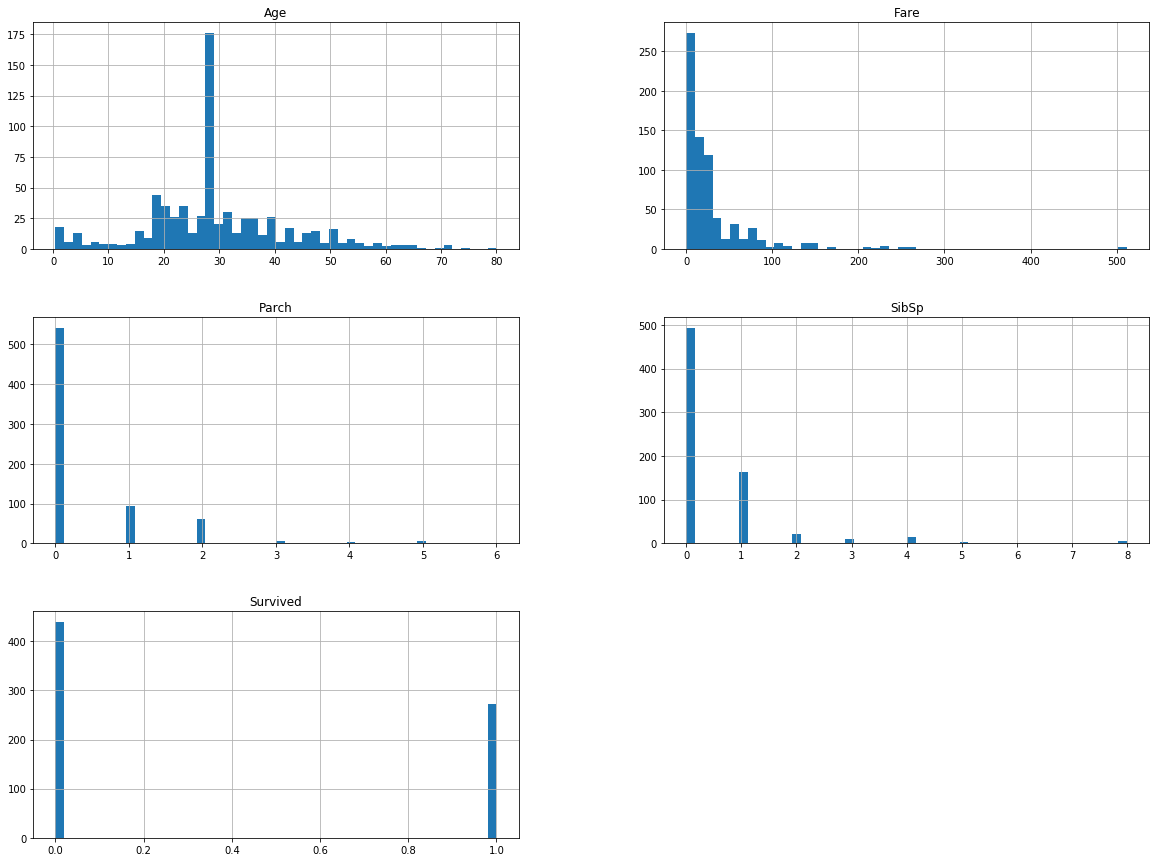

In [17]:
data_num_tran.hist(bins=50, figsize = (20,15) )
plt.show()

Change 0 fare for mean of fares

In [18]:
median_fare = data_num_tran["Fare"].median()
median_fare

14.4542

In [19]:
data_train = data_num_tran.copy()
data_train

,Survived,Age,SibSp,Parch,Fare
0,1.0,28.5,0.0,0.0,56.4958
1,0.0,28.5,0.0,0.0,0.0000
2,0.0,28.5,0.0,0.0,221.7792
3,1.0,18.0,0.0,1.0,9.3500
4,1.0,31.0,1.0,1.0,26.2500
...,...,...,...,...,...
707,1.0,28.5,0.0,0.0,7.8792
708,1.0,35.0,0.0,0.0,512.3292
709,0.0,48.0,1.0,3.0,34.3750
710,0.0,47.0,0.0,0.0,38.5000


In [20]:
def change_0(x):
    for i in range(len(x["Fare"])):
        if x["Fare"][i] == 0:
            x["Fare"][i] = median_fare
    return x

In [21]:
data_train = change_0(data_train)
data_train

,Survived,Age,SibSp,Parch,Fare
0,1.0,28.5,0.0,0.0,56.4958
1,0.0,28.5,0.0,0.0,14.4542
2,0.0,28.5,0.0,0.0,221.7792
3,1.0,18.0,0.0,1.0,9.3500
4,1.0,31.0,1.0,1.0,26.2500
...,...,...,...,...,...
707,1.0,28.5,0.0,0.0,7.8792
708,1.0,35.0,0.0,0.0,512.3292
709,0.0,48.0,1.0,3.0,34.3750
710,0.0,47.0,0.0,0.0,38.5000


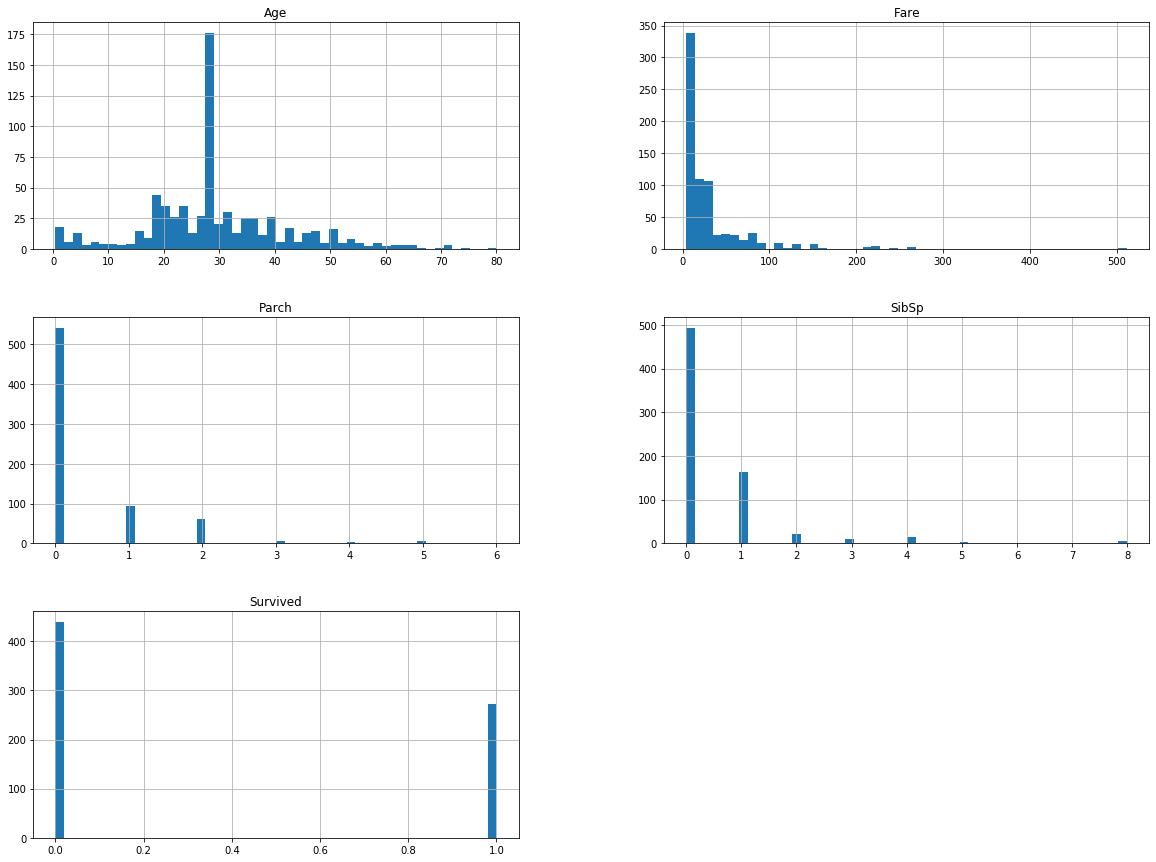

In [22]:
data_train.hist(bins=50, figsize = (20,15) )
plt.show()

Let us have some general idea of the numerical data

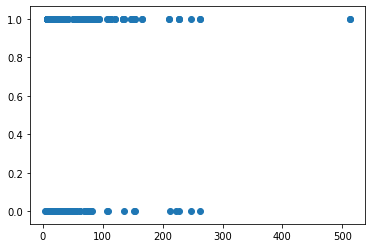

In [23]:
plt.scatter(data_train["Fare"],data_train["Survived"])

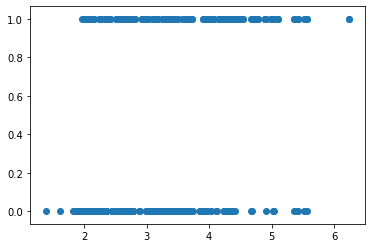

In [24]:
plt.scatter(np.log(data_train["Fare"]),data_train["Survived"])

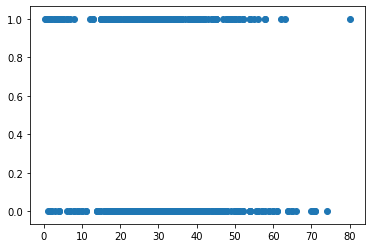

In [25]:
plt.scatter(data_train["Age"],data_train["Survived"])

   We wil first try the model with loging fare and then without to see the differences

In [26]:
log_data = data_train.copy()

In [27]:
log_data["Log_Fare"] = np.log(data_train["Fare"])
log_data = log_data.drop(["Fare"], axis=1)
log_data

,Survived,Age,SibSp,Parch,Log_Fare
0,1.0,28.5,0.0,0.0,4.034166
1,0.0,28.5,0.0,0.0,2.670985
2,0.0,28.5,0.0,0.0,5.401682
3,1.0,18.0,0.0,1.0,2.235376
4,1.0,31.0,1.0,1.0,3.267666
...,...,...,...,...,...
707,1.0,28.5,0.0,0.0,2.064226
708,1.0,35.0,0.0,0.0,6.238967
709,0.0,48.0,1.0,3.0,3.537330
710,0.0,47.0,0.0,0.0,3.650658


In [28]:
log_data["Log_Fare"][1]

2.6709850297651974

We should simplify our lives by making pipelines. First, make the fare median pipeline

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class Farewith0(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self
    
    def fit(self, X):
        return self # nothing else to do
   
    def transform(self, X, y=None):
        return change_0(X).values

Now, feature selection

In [30]:
class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ].values 

Finally, the log taker

In [31]:
class LogTaker(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self
    
    def fit(self, X):
        return self # nothing else to do
   
    def transform(self, X, y=None):
        col = np.log(X["Fare"])
        X["Log_Fare"] = col
        Xn = X.drop("Fare", axis=1)
        return Xn.values

However, we have the problem that each of these take as values only pd.DataFrames, but we will be dealing with np.arrays. So, we must modify every function to np.arrays.

In [32]:
from sklearn.preprocessing import StandardScaler

Now let us make the two pipelines

In [33]:
num_attribs = ["Age","SibSp","Parch","Fare"]
cat_attribs = ["Pclass","Sex","Cabin","Embarked"]

In [34]:
num_sel = FeatureSelector(num_attribs)
num_data_2 = num_sel.fit_transform(data)
num_data_2[0,3]

56.4958

In [35]:
def change_0_array(x):
    v=[]
    for i in range(len(x)):
        if x[i,3] == 0:
            v.append(median_fare)
        else:
            v.append(x[i,3])
        
    v = np.array(v)
    v = v.reshape(-1,1)
    x = np.append(x,v,axis=1)
    x = np.delete(x,3,1)
    return x

In [36]:
num_data_2 = change_0_array(num_data_2)

Making the appropriate pipelines

In [37]:
class Farewith0_num(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self
    
    def fit(self, X):
        return self # nothing else to do
   
    def transform(self, X, y=None):
        return change_0_array(X)

In [38]:
def logger(x):
    v = np.log(x[:,3])
    v = v.reshape(-1,1)
    x = np.append(x,v,axis=1)
    x = np.delete(x,3,1)
    return x

In [39]:
num_data_2

array([[     nan,   0.    ,   0.    ,  56.4958],
       [     nan,   0.    ,   0.    ,  14.4542],
       [     nan,   0.    ,   0.    , 221.7792],
       ...,
       [ 48.    ,   1.    ,   3.    ,  34.375 ],
       [ 47.    ,   0.    ,   0.    ,  38.5   ],
       [     nan,   0.    ,   0.    ,  26.55  ]])

In [40]:
class LogTaker_num(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self
    
    def fit(self, X):
        return self # nothing else to do
   
    def transform(self, X, y=None):
        return logger(X)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [42]:
unlog_pipeline = Pipeline(steps = [
    ('selector', FeatureSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('farewith0_num', Farewith0_num()),
    ('std_scaler', StandardScaler()),
 ])


In [43]:
unlog_pipeline.fit_transform(data)

array([[-0.08113533, -0.46508428, -0.46618317,  0.50944871],
       [-0.08113533, -0.46508428, -0.46618317, -0.36863623],
       [-0.08113533, -0.46508428, -0.46618317,  3.96157383],
       ...,
       [ 1.41700669,  0.47833454,  3.11571343,  0.04743153],
       [ 1.34017889, -0.46508428, -0.46618317,  0.13358668],
       [-0.08113533, -0.46508428, -0.46618317, -0.11600218]])

In [44]:
log_pipeline = Pipeline(steps = [
    ('selector', FeatureSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('farewith0', Farewith0_num()),
    ('log_taker', LogTaker_num()),
    ('std_scaler', StandardScaler()),
 ])

In [45]:
log_pipeline.fit_transform(data)

array([[-0.08113533, -0.46508428, -0.46618317,  1.18622048],
       [-0.08113533, -0.46508428, -0.46618317, -0.28476786],
       [-0.08113533, -0.46508428, -0.46618317,  2.66188635],
       ...,
       [ 1.41700669,  0.47833454,  3.11571343,  0.65009145],
       [ 1.34017889, -0.46508428, -0.46618317,  0.77238272],
       [-0.08113533, -0.46508428, -0.46618317,  0.37136402]])

With this, we have everything that we will later need to deal with the numerical data. Time to look at categorical data now.

In [46]:
cat_data = data.drop(num_attribs, axis =1)
cat_data

,Survived,Pclass,Sex,Cabin,Embarked
0,1,3,male,NaN,S
1,0,2,male,NaN,S
2,0,1,male,C95,S
3,1,3,female,NaN,S
4,1,2,female,NaN,S
...,...,...,...,...,...
707,1,3,female,NaN,Q
708,1,1,female,NaN,C
709,0,3,female,NaN,S
710,0,1,male,E63,S


I want to group the cabins together.

In [47]:
cat_data[cat_data["Cabin"].str.startswith("H",na=False)]

,Survived,Pclass,Sex,Cabin,Embarked


In [48]:
cat_data["Cabin"].str.startswith("A",na=False)[1] or cat_data["Cabin"].str.startswith("B",na=False)[1]

False

The following function will group the cabins together

In [49]:
def grouper(x):
    
    val = []
    
    for i in range(len(x["Cabin"])):
        if x["Cabin"].str.startswith("A",na=False)[i] or x["Cabin"].str.startswith("B",na=False)[i]:
            val.append(1)
        elif x["Cabin"].str.startswith("C",na=False)[i] or x["Cabin"].str.startswith("D",na=False)[i] or x["Cabin"].str.startswith("E",na=False)[i]:
            val.append(2)
        elif x["Cabin"].str.startswith("F",na=False)[i] or x["Cabin"].str.startswith("G",na=False)[i]:
            val.append(3)
        else:
            val.append(0)
    
    return val

Now, this function will deal with the non-given entries of "Embarked".

In [50]:
def naner(x):
    val = []
    
    for i in range(len(x["Embarked"])):
        if x["Embarked"][i] == "S":
            val.append( "S")
        elif x["Embarked"][i] == "Q":
            val.append( "Q")
        elif x["Embarked"][i] == "C":
            val.append("C")
        else:
            val.append("N")
    
    return  val


In fact, the one hot encoder is working (notice that we use drop first to drop one of the binary classes for each category to reduce dimensions).

In [51]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop="first")

Now we have to array every function in array form

In [52]:
cat_data

,Survived,Pclass,Sex,Cabin,Embarked
0,1,3,male,NaN,S
1,0,2,male,NaN,S
2,0,1,male,C95,S
3,1,3,female,NaN,S
4,1,2,female,NaN,S
...,...,...,...,...,...
707,1,3,female,NaN,Q
708,1,1,female,NaN,C
709,0,3,female,NaN,S
710,0,1,male,E63,S


In [53]:
def grouper_array(x):
    
    val = []
    d = {"Pclass":x[:,0],"Sex":x[:,1],"Cabin":x[:,2],"Embarked":x[:,3]}
    x_data = pd.DataFrame(data = d)
    
    
    for i in range(len(x_data["Cabin"])):
        if x_data["Cabin"].str.startswith("A",na=False)[i] or x_data["Cabin"].str.startswith("B",na=False)[i]:
            val.append(1)
        elif x_data["Cabin"].str.startswith("C",na=False)[i] or x_data["Cabin"].str.startswith("D",na=False)[i] or x_data["Cabin"].str.startswith("E",na=False)[i]:
            val.append(2)
        elif x_data["Cabin"].str.startswith("F",na=False)[i] or x_data["Cabin"].str.startswith("G",na=False)[i]:
            val.append(3)
        else:
            val.append(0)
    
    x_data["Cabin_new"] = val
    x_data = x_data.drop("Cabin", axis = 1)
    embarked = x_data["Embarked"]
    x_data = x_data.drop("Embarked", axis = 1)
    x_data["Embarked"] = embarked
    x = x_data.values
    return x

In [54]:
grouper_array(cat_data.values)

array([[1, 3, 0, nan],
       [0, 2, 0, nan],
       [0, 1, 0, 'C95'],
       ...,
       [0, 3, 0, nan],
       [0, 1, 0, 'E63'],
       [1, 1, 0, nan]], dtype=object)

In [55]:
def naner_array(x):
    val = []
    d = {"Pclass":x[:,0],"Sex":x[:,1],"Cabin":x[:,2],"Embarked":x[:,3]}
    x_data = pd.DataFrame(data = d)
    
    for i in range(len(x_data["Embarked"])):
        if x_data["Embarked"][i] == "S":
            val.append( "S")
        elif x_data["Embarked"][i] == "Q":
            val.append( "Q")
        elif x_data["Embarked"][i] == "C":
            val.append("C")
        else:
            val.append("N")
        
    x_data["Embarked_new"] = val
    x_data = x_data.drop("Embarked", axis = 1)
    
    x = x_data.values
    
    return x

In [56]:
naner_array(cat_data.values)

array([[1, 3, 'male', 'N'],
       [0, 2, 'male', 'N'],
       [0, 1, 'male', 'N'],
       ...,
       [0, 3, 'female', 'N'],
       [0, 1, 'male', 'N'],
       [1, 1, 'male', 'N']], dtype=object)

Make the categorical pipelines

In [57]:
class GrouperArray(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self
    
    def fit(self, X):
        return self # nothing else to do
   
    def transform(self, X, y=None):
        return grouper_array(X)

In [58]:
class NanerArray(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self
    
    def fit(self, X):
        return self # nothing else to do
   
    def transform(self, X, y=None):
        return naner_array(X)

In [59]:
cat_pipeline = Pipeline(steps = [
    ('selector', FeatureSelector(cat_attribs)),
    ('grouper', GrouperArray()),
    ('naner', NanerArray()),
    ('one_enconder', OneHotEncoder(drop="first",sparse =False)),
 ])

In [60]:
cat_pipeline.fit_transform(data)

array([[0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

Finally, we will define the full pipelines

In [61]:
full_pipeline_unlog = FeatureUnion([
    ("num_pipeline", unlog_pipeline),
    ("cat_pipeline", cat_pipeline)
 ])

In [62]:
full_pipeline_log = FeatureUnion([
    ("num_pipeline", log_pipeline),
    ("cat_pipeline", cat_pipeline)
 ])

Finally dividing the data into features and labels

In [63]:
label = data["Survived"]
features = data.drop("Survived", axis = 1)
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,NaN,0,0,56.4958,NaN,S
1,2,male,NaN,0,0,0.0000,NaN,S
2,1,male,NaN,0,0,221.7792,C95,S
3,3,female,18.0,0,1,9.3500,NaN,S
4,2,female,31.0,1,1,26.2500,NaN,S
...,...,...,...,...,...,...,...,...
707,3,female,NaN,0,0,7.8792,NaN,Q
708,1,female,35.0,0,0,512.3292,NaN,C
709,3,female,48.0,1,3,34.3750,NaN,S
710,1,male,47.0,0,0,38.5000,E63,S


In [64]:
unlog_features = full_pipeline_unlog.fit_transform(features)
log_features = full_pipeline_log.fit_transform(features)

Now we will use a random forest.

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

Now for probabilities ROC

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [67]:
unlog_probas_forest = cross_val_predict(forest_clf, unlog_features, label, cv=3,
 method="predict_proba")
log_probas_forest = cross_val_predict(forest_clf, log_features, label, cv=3,
 method="predict_proba")

In [68]:
unlog_scores_forest = unlog_probas_forest[:, 1] # score = proba of positive class
fpr_un_forest, tpr_un_forest, thresholds_forest = roc_curve(label,unlog_scores_forest)

log_scores_forest = log_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(label,log_scores_forest)

In [69]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


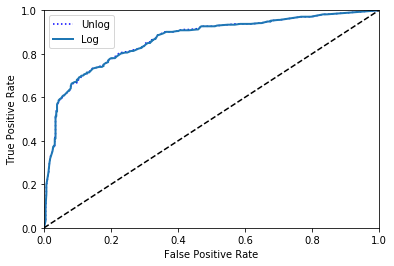

In [70]:
plt.plot(fpr_un_forest, tpr_un_forest, "b:", label="Unlog")
plot_roc_curve(fpr_forest, tpr_forest, "Log")
plt.legend(loc="bottom right")
plt.show()

They literally perform the same! We will use log then

In [71]:
label_pred = cross_val_predict(forest_clf, log_features, label, cv=3)

In [72]:
 confusion_matrix(label, label_pred)

array([[380,  59],
       [ 78, 195]], dtype=int64)